# Desain Model AI untuk Project SafeFood

### **Deskripsi Arsitektur Model Neural Network - SafeFood Project**

1. **Input Layer**:  
   - Ukuran input layer menyesuaikan dengan jumlah fitur pada dataset latih.
   - Layer ini menerima data yang sudah melalui preprocessing.

2. **Hidden Layer**:  
   - **Jumlah Hidden Layer**: 1.  
   - **Jumlah Neuron**: 96 neuron.  
   - **Fungsi Aktivasi**: ReLU (Rectified Linear Unit).  
   - **Dropout**: Dropout layer dengan tingkat dropout sebesar 20% diterapkan setelah hidden layer untuk mencegah overfitting.

3. **Output Layer**:  
   - **Jumlah Neuron**: 1 neuron (karena ini adalah tugas regresi).  
   - **Fungsi Aktivasi**: Linear (cocok untuk memprediksi nilai kontinu seperti `matching_score`).

4. **Hyperparameter Model**:  
   - **Loss Function**: Mean Squared Error (MSE).  
     - MSE dipilih karena tugas ini merupakan masalah regresi, di mana kita ingin meminimalkan rata-rata kuadrat dari kesalahan prediksi.
   - **Optimizer**: Adam Optimizer.  
     - **Learning Rate**: 0.0009686835179818646 (hasil tuning hyperparameter terbaik).  
   - **Metrics**: Mean Absolute Error (MAE) digunakan sebagai metrik evaluasi tambahan untuk memantau performa model selama pelatihan.

5. **Pengaturan Pelatihan**:  
   - **Batch Size**: 32 (mini-batch stochastic gradient descent).  
   - **Epochs**: Maksimum 50 epoch.  
   - **Callback**: Early Stopping diterapkan dengan konfigurasi:  
     - **Patience**: 5 (pelatihan dihentikan lebih awal jika validasi loss tidak membaik selama 5 epoch berturut-turut).  
     - **Restore Best Weights**: True (mengembalikan bobot model ke kondisi terbaik saat validasi loss terendah).  

6. **Evaluasi dan Penyimpanan**:  
   - Model dievaluasi menggunakan dataset test untuk menghitung `Test Loss` dan `Test MAE`.
   - Model disimpan dalam format Keras dengan nama `model_safefood_best.keras` di direktori `../models`.

7. **Visualisasi Hasil Pelatihan**:  
   - **Training vs Validation Loss**: Grafik ditampilkan untuk memantau tren loss selama pelatihan.
   - **Training vs Validation MAE**: Grafik ditampilkan untuk memantau tren MAE selama pelatihan.

---

### **Penjelasan Singkat**
Model ini dirancang untuk memprediksi nilai **matching_score** berdasarkan atribut donor dan penerima makanan. Dengan arsitektur sederhana (1 hidden layer dengan 96 neuron), model ini menggabungkan dropout untuk regularisasi dan menggunakan optimizer Adam dengan learning rate yang telah dituning.

Desain ini bertujuan untuk memastikan performa yang stabil sambil mencegah overfitting. Model dievaluasi secara menyeluruh menggunakan training, validation, dan test set.

Import Library yang dibutuhkan :

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

print("Library berhasil diimport")

Library berhasil diimport


Muat dataset yang diperlukan :

In [4]:
# Membaca dataset
train_data = pd.read_csv('../data/processed/training_set.csv')
val_data = pd.read_csv('../data/processed/validation_set.csv')
test_data = pd.read_csv('../data/processed/test_set.csv')

# Menghapus kolom yang tidak diperlukan
x_train = train_data.drop(columns=['id_penyumbang', 'id_penerima', 'matching_score'])
y_train = train_data['matching_score']

x_val = val_data.drop(columns=['id_penyumbang', 'id_penerima', 'matching_score'])
y_val = val_data['matching_score']

x_test = test_data.drop(columns=['id_penyumbang', 'id_penerima', 'matching_score'])
y_test = test_data['matching_score']

print("Dataset berhasil diimport")

Dataset berhasil diimport


Membuat Model :

In [5]:
model = Sequential([
    InputLayer(shape=(x_train.shape[1],)),
    Dense(96, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

print("Model berhasil dibuat")

Model berhasil dibuat


Mengkompilasi Model :

In [6]:
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.0009686835179818646),
    metrics=['mae']
)

print("Model berhasil dikompilasi")

Model berhasil dikompilasi


Melatih Model :

In [7]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            patience=5,
            restore_best_weights=True
        )
    ],
    verbose=1
)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1419 - mae: 0.2746 - val_loss: 0.0113 - val_mae: 0.0847
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0250 - mae: 0.1250 - val_loss: 0.0071 - val_mae: 0.0669
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0148 - mae: 0.0958 - val_loss: 0.0056 - val_mae: 0.0593
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0104 - mae: 0.0814 - val_loss: 0.0042 - val_mae: 0.0516
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0085 - mae: 0.0731 - val_loss: 0.0037 - val_mae: 0.0484
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0076 - mae: 0.0701 - val_loss: 0.0034 - val_mae: 0.0472
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0065 - mae: 0.0645 - val_loss: 0.0032 - val_mae: 0.0461
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0060 - mae: 0.0616 - val_loss: 0.0032 - val_mae: 0.0451
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - lo

Menampilkan Plot :

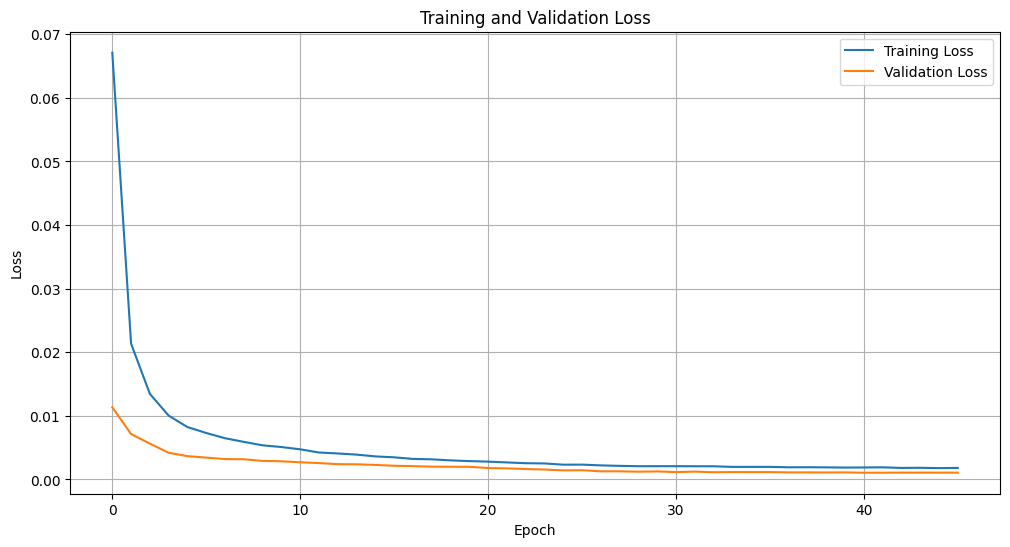

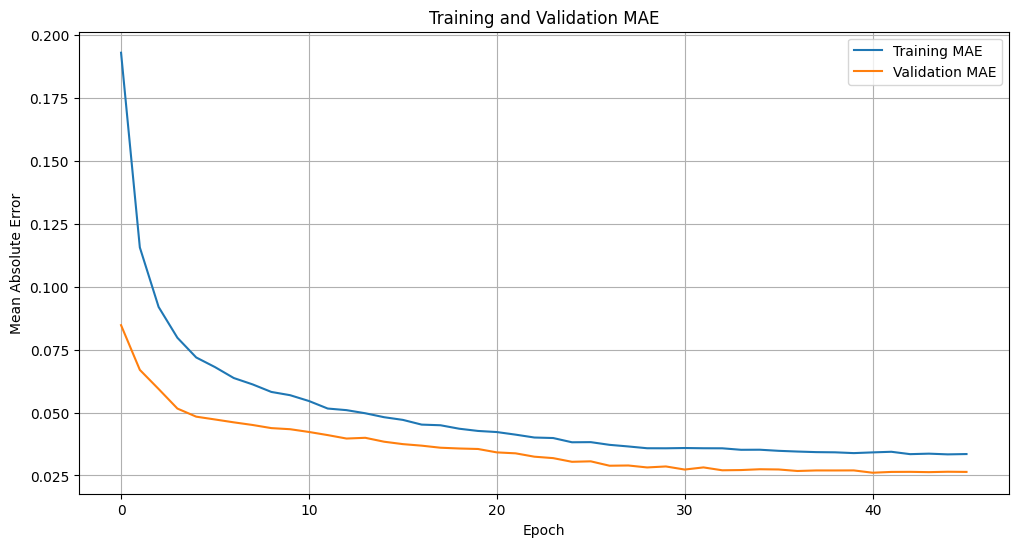

Model berhasil dilatih


In [8]:
plt.figure(figsize=(12, 6))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))

plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')

plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

print("Model berhasil dilatih")

Evaluasi Model :

In [9]:
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - mae: 0.0268
Test Loss: 0.001091417041607201, Test MAE: 0.026679325848817825


Menyimpan Model :

In [10]:
import time
saved_model_path = "../models/{}.h5".format(int(time.time()))

model.save(saved_model_path)

In [18]:
!tensorflowjs_converter --input_format=keras {saved_model_path} ./


Traceback (most recent call last):
  File "C:\Program Files\Python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Program Files\Python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\aryas\AppData\Roaming\Python\Python39\Scripts\tensorflowjs_converter.exe\__main__.py", line 4, in <module>
    from tensorflowjs.converters.converter import pip_main
  File "C:\Users\aryas\AppData\Roaming\Python\Python39\site-packages\tensorflowjs\__init__.py", line 21, in <module>
    from tensorflowjs import converters
  File "C:\Users\aryas\AppData\Roaming\Python\Python39\site-packages\tensorflowjs\converters\__init__.py", line 21, in <module>
    from tensorflowjs.converters.converter import convert
  File "C:\Users\aryas\AppData\Roaming\Python\Python39\site-packages\tensorflowjs\converters\converter.py", line 38, in <module>
    from tensorflowjs.converters import tf_saved_model_conversion_v2
  File "C:\U